In [2]:
from mnist_deep_nf import *

/apps/conda/joao.pires/.envs/jpt_main/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[rank: 0] Seed set to 42


In [3]:
import pickle 
with open('test_dic.pkl', 'rb') as fp:
    test_dic = pickle.load(fp)

with open('train_dic.pkl', 'rb') as fp:
    train_dic = pickle.load(fp)


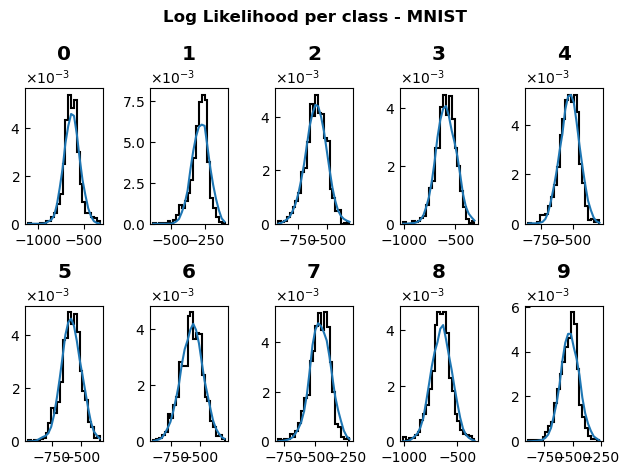

In [4]:
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, ScalarFormatter) 
fig, ax = plt.subplots(ncols = 5, nrows = 2)
plt.style.use('ggplot')
idx1 = 0

for i in range(2):
    for j in range(5):
        distribution = test_dic[str(idx1)]['ll']

        n, x, _ = ax[i,j].hist(distribution, histtype=u'step', bins = 25, density = True, color = 'k', lw = 1.5);
        noise = np.random.normal(np.median(distribution), np.std(distribution), (2000, ))
        density = stats.gaussian_kde(noise)
        ax[i,j].plot(x, density(x))
        
        ax[i,j].set_title(idx1, weight = 'bold');
        idx1+=1
        ax[i,j].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        ax[i,j].tick_params(axis = 'y', which = 'both', direction = 'in')
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((-1, 1))  # Adjust the power limits as needed
        ax[i,j].yaxis.set_major_formatter(formatter)


# plt.subplots_adjust(wspace = 0.25, hspace = 0.35)
fig.suptitle('Log Likelihood per class - MNIST', weight = 'bold')
plt.tight_layout()
# plt.savefig('./images/perclass_mnist_histogram_ll.png')



In [53]:
perez = stats.norm.rvs(loc = np.mean(test_dic['5']['ll']), scale = np.std(test_dic['5']['ll'])**2, size = 1000)

In [54]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
seed(1)

stat, p = shapiro(perez)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.998, p=0.250
Sample looks Gaussian (fail to reject H0)


In [55]:
from scipy.stats import anderson

seed(1)

result = anderson(perez)
print('Statistic: %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.370
15.000: 0.574, data looks normal (fail to reject H0)
10.000: 0.653, data looks normal (fail to reject H0)
5.000: 0.784, data looks normal (fail to reject H0)
2.500: 0.914, data looks normal (fail to reject H0)
1.000: 1.088, data looks normal (fail to reject H0)


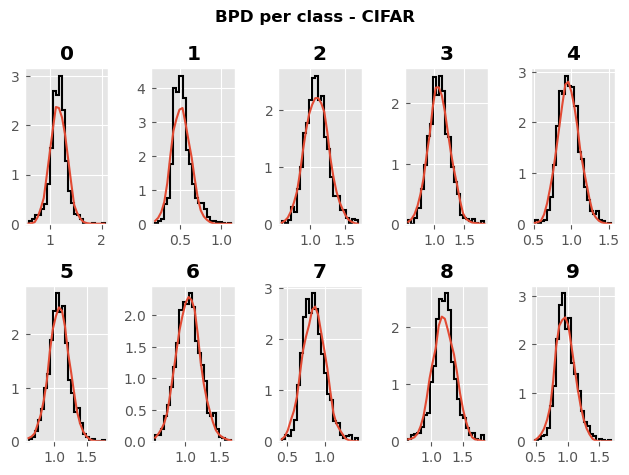

In [80]:

fig, ax = plt.subplots(ncols = 5, nrows = 2)
plt.style.use('ggplot')
idx1 = 0
for i in range(2):
    for j in range(5):
        distribution = test_dic[str(idx1)]['bpd']

        n, x, _ = ax[i,j].hist(distribution, histtype=u'step', bins = 25, density = True, color = 'k', lw = 1.5);
        noise = np.random.normal(np.median(distribution), np.std(distribution), (2000, ))
        density = stats.gaussian_kde(noise)
        ax[i,j].plot(x, density(x))
        
        ax[i,j].set_title(idx1, weight = 'bold');
        idx1+=1
        ax[i,j].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        ax[i,j].tick_params(axis = 'y', which = 'both', direction = 'in')
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((-1, 1))  # Adjust the power limits as needed
        ax[i,j].yaxis.set_major_formatter(formatter)


plt.subplots_adjust(wspace = 0.25, hspace = 0.35)
fig.suptitle('BPD per class - MNIST', weight = 'bold')
plt.tight_layout()
plt.savefig('./images/perclass_histogram_mnist_bpd.png')



In [59]:
lls_sorted = []
bpds_sorted = []

means_ll = []
stds_ll = []
means_bpd = []
stds_bpd = []


for key in test_dic:
    lls_sorted.append(np.argsort(test_dic[key]['ll']))
    bpds_sorted.append(np.argsort(test_dic[key]['bpd']))
    
    means_ll.append(np.mean(test_dic[key]['ll']))
    stds_ll.append(np.std(test_dic[key]['ll']))
    
    means_bpd.append(np.mean(test_dic[key]['bpd']))
    stds_bpd.append(np.std(test_dic[key]['bpd']))

In [60]:
how_many_ood = []
how_many_bpd = []

for i in range(0,10):
    key = str(i)
    lls = test_dic[key]['ll'] < means_ll[i] - 2*stds_ll[i]
    bpds = test_dic[key]['bpd'] < means_bpd[i] - 2*stds_bpd[i]
    how_many_ood.append(lls.sum())
    how_many_bpd.append(bpds.sum())

In [61]:
how_many_ood, how_many_bpd

([29, 57, 36, 26, 35, 28, 28, 34, 27, 35],
 [35, 7, 19, 11, 13, 19, 16, 12, 26, 14])

In [76]:
final = ''
for i, element in enumerate(means_ll):
    final += f'{i} & {means_ll[i]: .0f} & {stds_ll[i]: .0f} & {how_many_ood[i]} \\\ \n '

print(final)

0 & -633 &  87 & 29 \\ 
 1 & -291 &  62 & 57 \\ 
 2 & -596 &  90 & 36 \\ 
 3 & -591 &  93 & 26 \\ 
 4 & -529 &  76 & 35 \\ 
 5 & -586 &  87 & 28 \\ 
 6 & -573 &  96 & 28 \\ 
 7 & -466 &  80 & 34 \\ 
 8 & -654 &  95 & 27 \\ 
 9 & -535 &  82 & 35 \\ 
 


In [79]:
final = ''
for i, element in enumerate(means_bpd):
    final += f'{i} & {means_bpd[i]: .3f} & {stds_bpd[i]: .3f} & {how_many_bpd[i]} \\\ \n '

print(final)

0 &  1.164 &  0.160 & 35 \\ 
 1 &  0.535 &  0.114 & 7 \\ 
 2 &  1.097 &  0.165 & 19 \\ 
 3 &  1.088 &  0.172 & 11 \\ 
 4 &  0.972 &  0.139 & 13 \\ 
 5 &  1.079 &  0.160 & 19 \\ 
 6 &  1.053 &  0.177 & 16 \\ 
 7 &  0.858 &  0.147 & 12 \\ 
 8 &  1.203 &  0.176 & 26 \\ 
 9 &  0.984 &  0.151 & 14 \\ 
 


In [62]:
np.sum(how_many_ood), np.sum(how_many_bpd), np.sum(how_many_ood)/len(test_set), np.sum(how_many_bpd)/len(test_set)

(335, 172, 0.0335, 0.0172)

In [63]:
i = 0
for key in test_dic:
    print(how_many_ood[i]/len(test_dic[key]['ll']))
    i+=1
    

0.02959183673469388
0.050220264317180616
0.03488372093023256
0.02574257425742574
0.035641547861507125
0.03139013452914798
0.029227557411273485
0.033073929961089495
0.027720739219712527
0.03468780971258672


In [41]:
def show_imgs_save(imgs, title=None, row_size=8, fig_name = None):
    # Form a grid of pictures (we use max. 8 columns)
    num_imgs = imgs.shape[0] if isinstance(imgs, torch.Tensor) else len(imgs)
    is_int = imgs.dtype==torch.int32 if isinstance(imgs, torch.Tensor) else imgs[0].dtype==torch.int32
    nrow = min(num_imgs, row_size)
    ncol = int(math.ceil(num_imgs/nrow))
    imgs = torchvision.utils.make_grid(imgs, nrow=nrow, pad_value=128 if is_int else 0.5)
    np_imgs = imgs.cpu().numpy()
    # Plot the grid
    plt.figure(figsize=(1.5*nrow, 1.5*ncol))
    plt.imshow(np.transpose(np_imgs, (1,2,0)), interpolation='nearest')
    plt.axis('off')
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    plt.savefig(fig_name + '.png', format = 'png')
    plt.show()
    plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


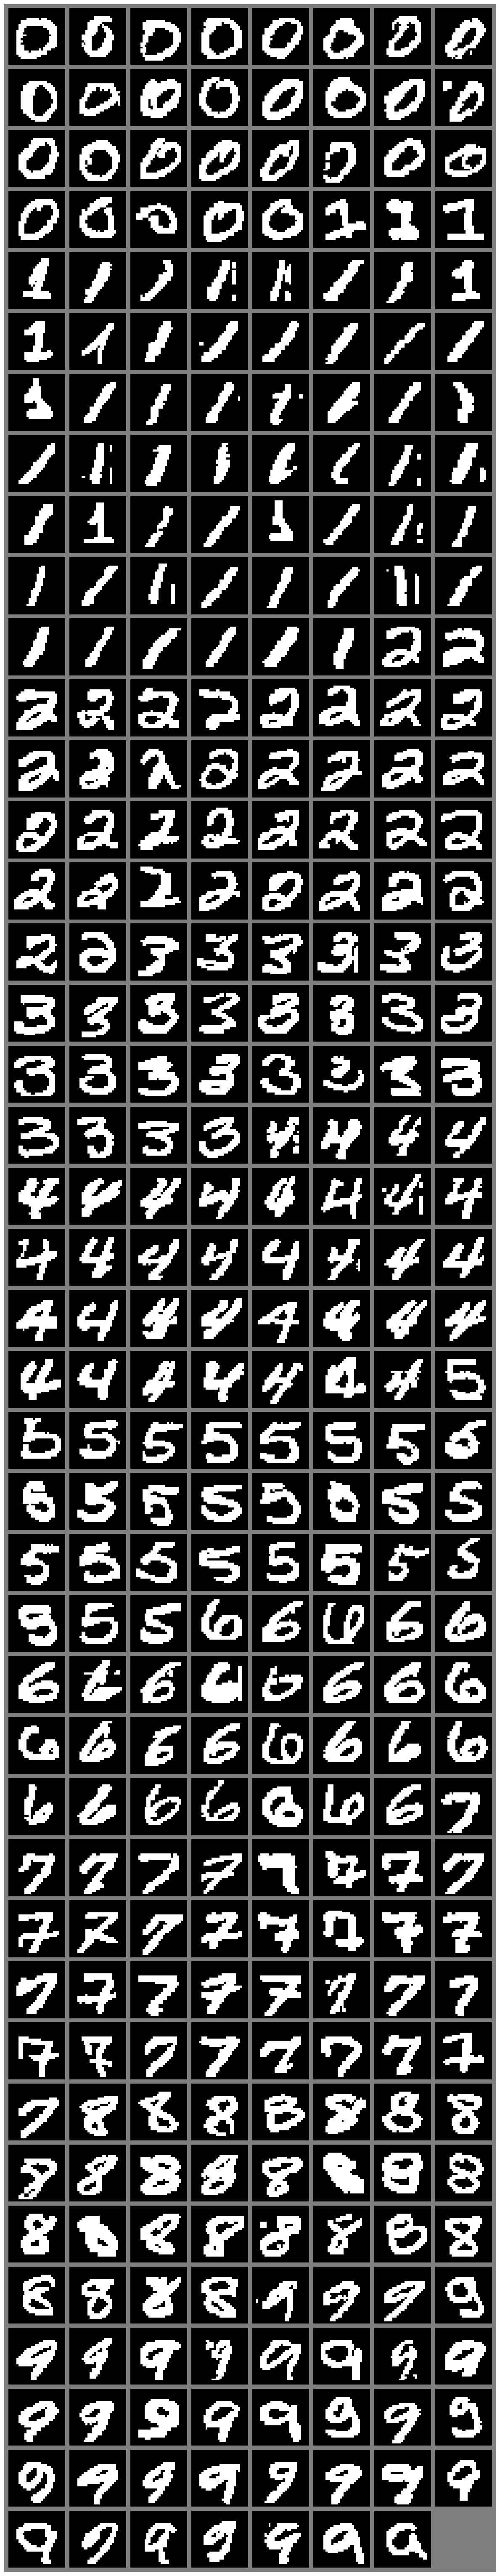

In [42]:
number_of_anomalous = np.sum(how_many_ood)

top_anomalous = torch.zeros(size = (number_of_anomalous, 1, 28, 28))

j = 0

for i in range(10):
    pos = lls_sorted[i][:how_many_ood[i]]
    for element in (pos):
        top_anomalous[j] = test_dic[str(i)]['img'][element]
        j += 1

show_imgs_save(top_anomalous, fig_name  = 'images/mnist_perclass_ll')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


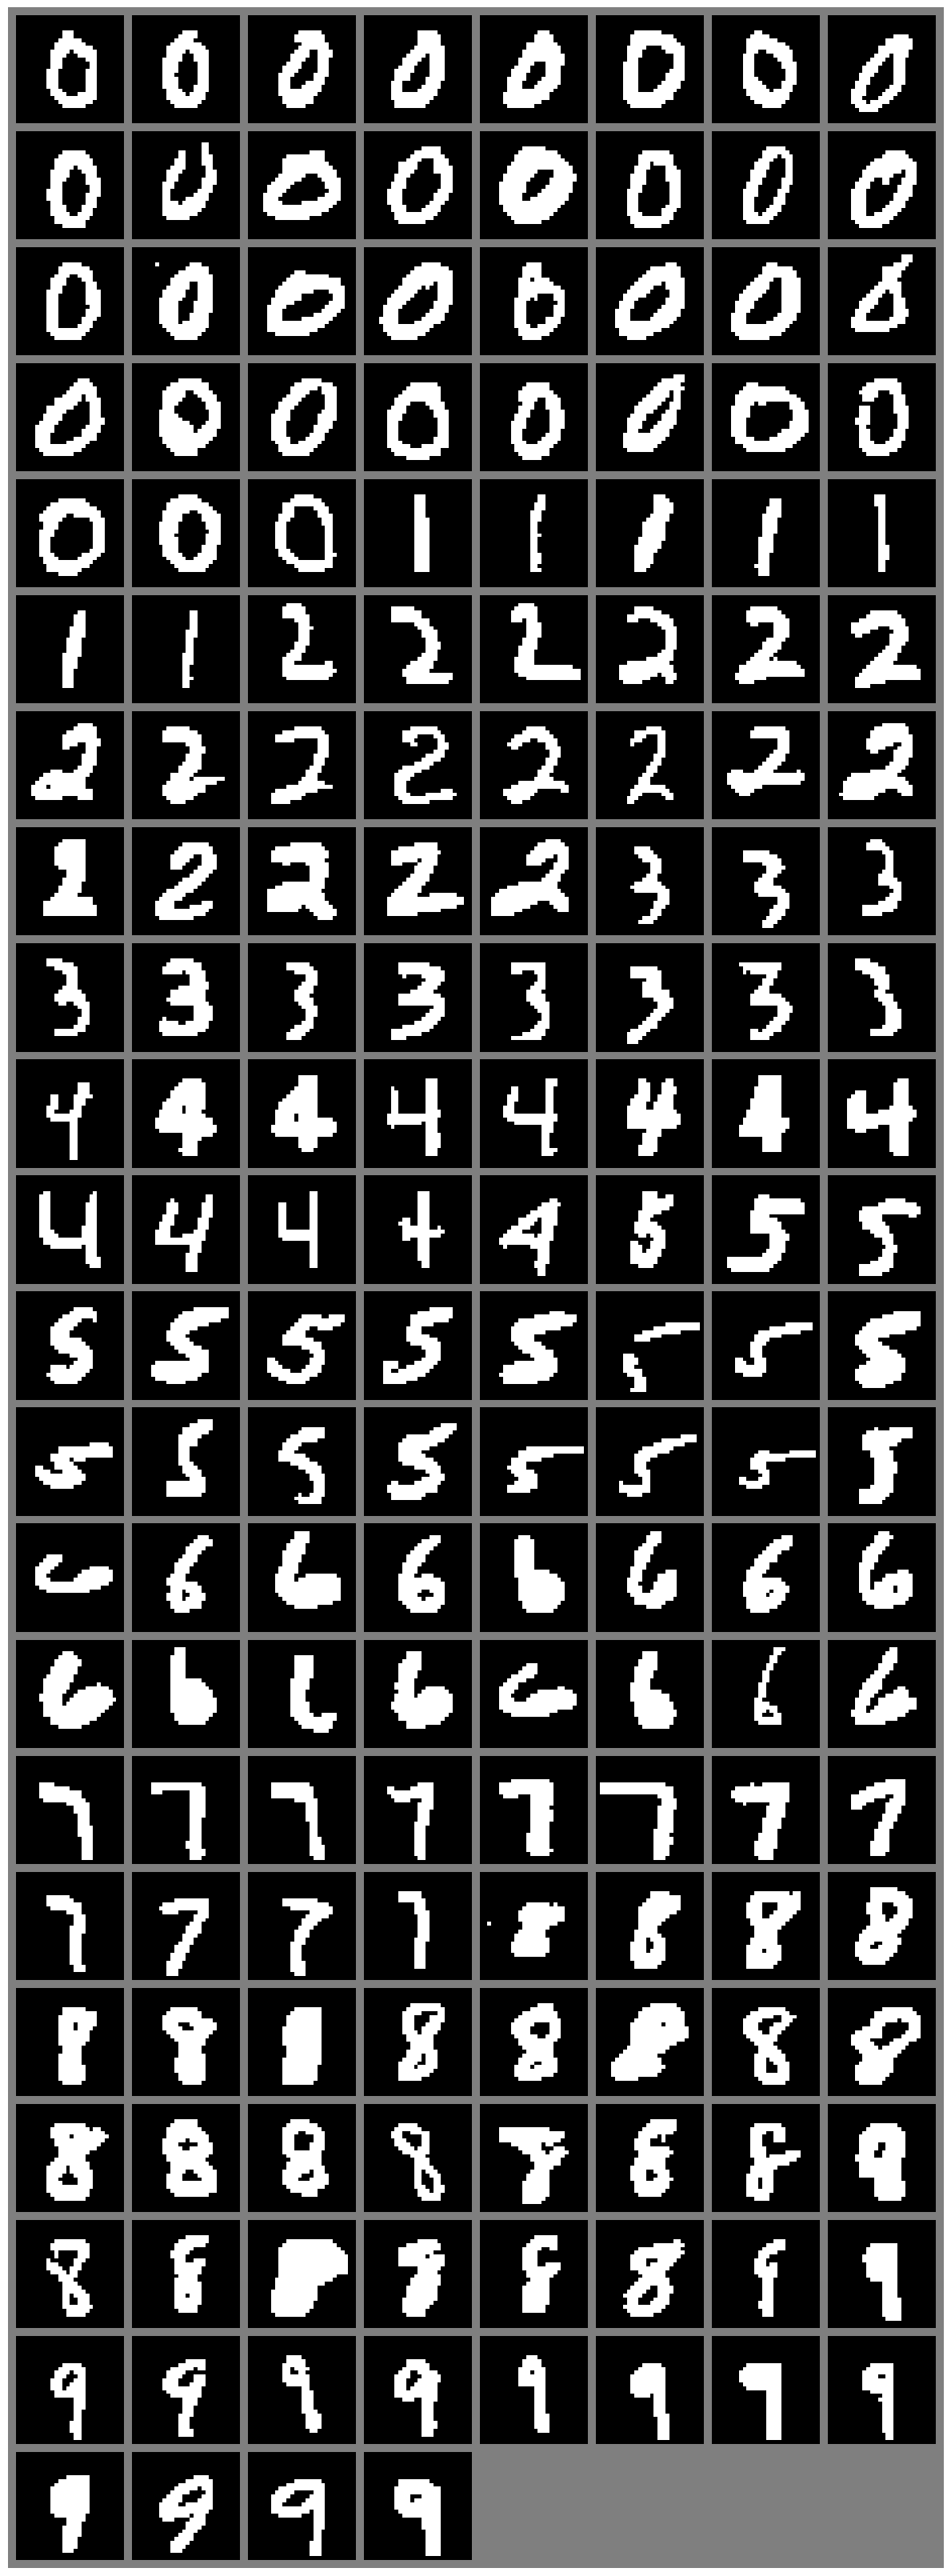

In [43]:
number_of_anomalous = np.sum(how_many_bpd)

top_anomalous = torch.zeros(size = (number_of_anomalous, 1, 28, 28))

j = 0

for i in range(10):
    pos = bpds_sorted[i][:how_many_bpd[i]]
    for element in (pos):
        top_anomalous[j] = test_dic[str(i)]['img'][element]
        j += 1

show_imgs_save(top_anomalous, fig_name  = 'images/mnist_perclass_bpd')